In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('comprehensive_mutual_funds_data.csv',na_values='-')
data

scheme_name  min_sip  min_lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0             0.27          10.0           10      Kaustubh Gupta     0.32   
1             0.36        4288.0           10    Lovelish Solanki     1.33   
2             0.53         157.0           10  Vinod Narayan Bhat     3.44   
3             0.76         637.0            4         Atul Penkar     2.18   
4             0.61        6386.0           10        Mohit Sharma     3.69   
..             ...           ...          ...                 ...      ...   
809           0.96        5068.0           10     Amandeep Chopra     2.47   
810           1.16        6740.0           10   Vetri Subramaniam     3.21   
811           0.26         197.0            4     Piyush Baranwal    -0.42   
812           0.22          14.0            4     Piyush Baranwal    -0.42   
813           0.33         141.0            4     Piyush Baranwal     2.81   

     alpha     sd  beta  sharpe  risk_level  \
0     2.24   9.39  0.01    0.24           3   
1     1.53   0.72  0.56    1.10           1   
2     2.67  10.58  0.67    1.42           5   
3    -6.37  14.99  0.85    0.90           6   
4     1.99  10.38  0.68    1.39           6   
..     ...    ...   ...     ...         ...   
809   0.92   7.06  0.44    1.29           4   
810   2.73  15.62  0.90    1.48           6   
811   0.93   0.39  0.72   -0.07           1   
812   0.93   0.39  0.72   -0.07           1   
813   1.20   0.72  0.47    0.80           1   

                              amc_name  rating           category  \
0    Aditya Birla Sun Life Mutual Fund       3              Other   
1    Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2    Aditya Birla Sun Life Mutual Fund       3              Other   
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4    Aditya Birla Sun Life Mutual Fund       4             Hybrid   
..                                 ...     ...                ...   
809                    UTI Mutual Fund       0             Hybrid   
810                    UTI Mutual Fund       4             Equity   
811       WhiteOak Capital Mutual Fund       1               Debt   
812       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                                       sub_category  returns_1yr  returns_3yr  \
0                                     FoFs Domestic          4.0          6.5   
1                            Arbitrage Mutual Funds          5.6          4.8   
2                                     FoFs Domestic          2.0         18.9   
3                                   Childrens Funds         -0.7         17.1   
4    Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
..                                              ...          ...          ...   
809  Dynamic Asset Allocation or Balanced Advantage         -0.7         13.1   
810                                     Value Funds          1.7         27.2   
811                   

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        791 non-null    float64
 8   alpha          772 non-null    float64
 9   sd             790 non-null    float64
 10  beta           772 non-null    float64
 11  sharpe         791 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [4]:
data.describe()

min_sip   min_lumpsum  expense_ratio  fund_size_cr  fund_age_yr  \
count   814.000000    814.000000     814.000000    814.000000   814.000000   
mean    528.500000   3047.468059       0.713231   3812.854214     8.319410   
std     369.184517   2514.619513       0.482161   7181.479475     2.640622   
min       0.000000      0.000000       0.000000      2.380000     1.000000   
25%     150.000000    500.000000       0.310000    175.250000     6.000000   
50%     500.000000   5000.000000       0.615000    940.500000    10.000000   
75%    1000.000000   5000.000000       1.030000   3819.000000    10.000000   
max    2000.000000  25000.000000       2.590000  57052.000000    17.000000   

          sortino       alpha          sd        beta      sharpe  risk_level  \
count  791.000000  772.000000  790.000000  772.000000  791.000000  814.000000   
mean     2.652642    2.505635   10.272696    0.822241    1.204185    4.400491   
std      1.392228    3.951573    7.805667    1.309871    0.536431    1.814741   
min     -1.770000  -13.360000    0.270000  -31.860000   -0.820000    1.000000   
25%      1.750000    0.530000    2.162500    0.700000    0.930000    3.000000   
50%      2.870000    1.855000   12.300000    0.860000    1.290000    6.000000   
75%      3.470000    3.847500   16.437500    0.970000    1.550000    6.000000   
max     12.570000   27.240000   77.720000    5.400000    3.520000    6.000000   

           rating  returns_1yr  returns_3yr  returns_5yr  
count  814.000000   814.000000   793.000000   647.000000  
mean     2.641278     3.921376    18.525347     9.490726  
std      1.463476     6.675502    12.108476     3.714015  
min      0.000000   -19.700000     3.300000    -4.100000  
25%      2.000000     1.500000     6.200000     6.700000  
50%      3.000000     4.400000    18.500000     8.900000  
75%      4.000000     5.600000    27.100000    12.200000  
max      5.000000   130.800000    71.400000    23.200000

In [5]:
data.isnull().sum()

scheme_name        0
min_sip            0
min_lumpsum        0
expense_ratio      0
fund_size_cr       0
fund_age_yr        0
fund_manager       0
sortino           23
alpha             42
sd                24
beta              42
sharpe            23
risk_level         0
amc_name           0
rating             0
category           0
sub_category       0
returns_1yr        0
returns_3yr       21
returns_5yr      167
dtype: int64

[Text(0.5, 1.0, 'showing null data in dataset')]

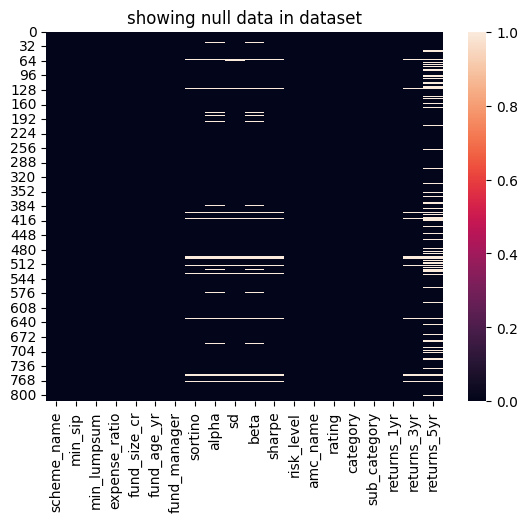

In [6]:
sns.heatmap(data.isnull()).set(title='showing null data in dataset')


### calculating mean of null columns

In [7]:
data['sd']=data.groupby('category')['sd'].apply(lambda x:x.fillna(x.mean()))
data['sortino']=data.groupby('category')['sortino'].apply(lambda x:x.fillna(x.mean()))
data['alpha']=data.groupby('category')['alpha'].apply(lambda x:x.fillna(x.mean()))
data['beta']=data.groupby('category')['beta'].apply(lambda x:x.fillna(x.mean()))
data['sharpe']=data.groupby('category')['sharpe'].apply(lambda x:x.fillna(x.mean()))
data['returns_3yr']=data.groupby('category')['returns_3yr'].apply(lambda x:x.fillna(x.mean()))
data['returns_5yr']=data.groupby('category')['returns_5yr'].apply(lambda x:x.fillna(x.mean()))

In [8]:
data.isnull().sum()

scheme_name      0
min_sip          0
min_lumpsum      0
expense_ratio    0
fund_size_cr     0
fund_age_yr      0
fund_manager     0
sortino          0
alpha            0
sd               0
beta             0
sharpe           0
risk_level       0
amc_name         0
rating           0
category         0
sub_category     0
returns_1yr      0
returns_3yr      0
returns_5yr      0
dtype: int64

[Text(0.5, 1.0, 'showing null data in dataset')]

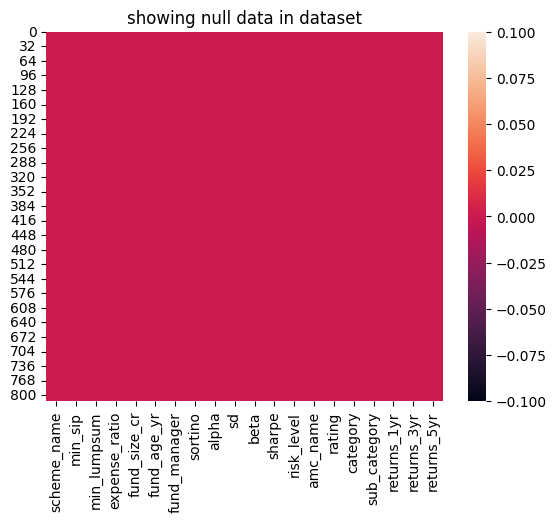

In [9]:
sns.heatmap(data.isnull()).set(title='showing null data in dataset')

<Axes: >

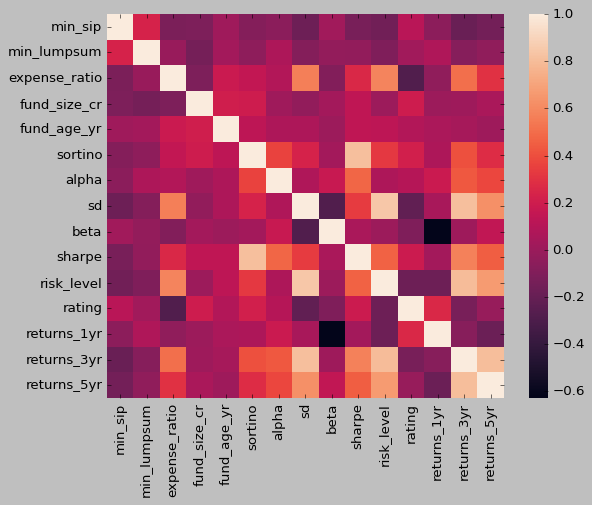

In [78]:
sns.heatmap(data.corr())

In [10]:
data.to_csv('mutual_fund_cleanup.csv')

In [11]:
a=data['alpha'].value_counts()
a


 2.160000    20
 0.513594    16
 0.670000     7
 3.402550     6
 0.230000     5
             ..
 6.920000     1
-1.650000     1
 9.870000     1
 4.850000     1
 0.920000     1
Name: alpha, Length: 542, dtype: int64

In [12]:
a.transpose()

 2.160000    20
 0.513594    16
 0.670000     7
 3.402550     6
 0.230000     5
             ..
 6.920000     1
-1.650000     1
 9.870000     1
 4.850000     1
 0.920000     1
Name: alpha, Length: 542, dtype: int64

### line chart


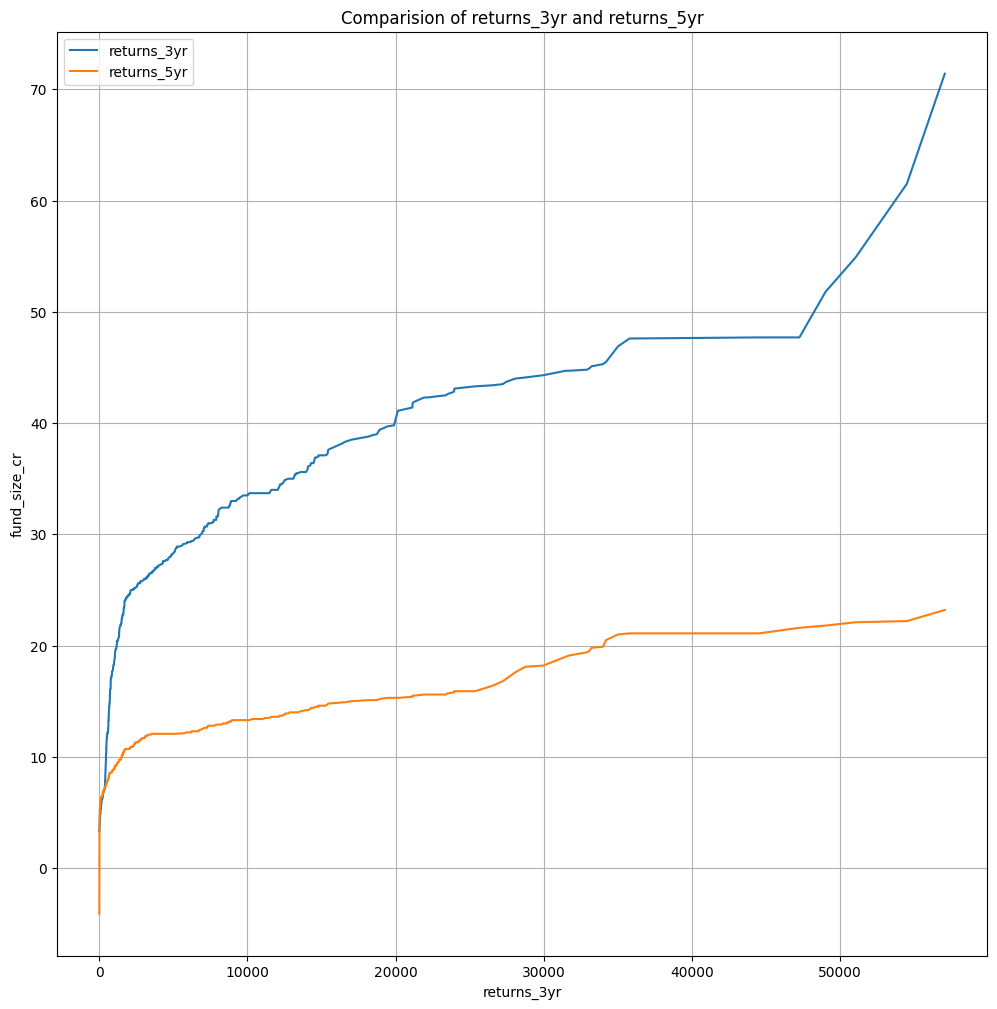

In [13]:
plt.figure(figsize=(12,12))
plt.plot(data['fund_size_cr'].sort_values(ascending=True),data['returns_3yr'].sort_values(ascending=True),label='returns_3yr',)
plt.plot(data['fund_size_cr'].sort_values(ascending=True),data['returns_5yr'].sort_values(ascending=True),label='returns_5yr')
plt.xlabel('returns_3yr')
plt.ylabel('fund_size_cr')
plt.legend(loc='upper left')
plt.grid()
plt.title('Comparision of returns_3yr and returns_5yr')
plt.show()

## conclusion :- The line chart illustrates the 3 years returns policy gives more returns than 5 years returns policy

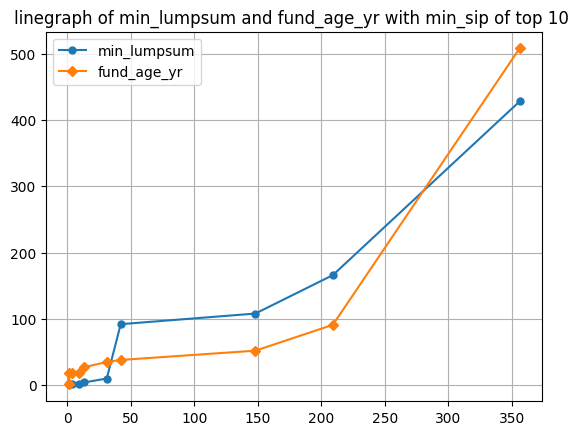

In [14]:
plt.plot(data['min_sip'].value_counts().head(10),data['min_lumpsum'].value_counts().head(10),label='min_lumpsum',markersize=5,marker='o')
plt.plot(data['min_sip'].value_counts().head(10),data['fund_age_yr'].value_counts().head(10),label='fund_age_yr',markersize=5,marker='D')
plt.grid()
plt.legend(loc='upper left')
plt.title('linegraph of min_lumpsum and fund_age_yr with min_sip of top 10 ')
plt.show()

In [15]:
data['risk_level'].replace({1:'Moderate Low',2:'Low',3:'Moderate Medium',4:'Medium',5:'Moderate High',6:'High'})
data['risk_level']

0      3
1      1
2      5
3      6
4      6
      ..
809    4
810    6
811    1
812    1
813    1
Name: risk_level, Length: 814, dtype: int64

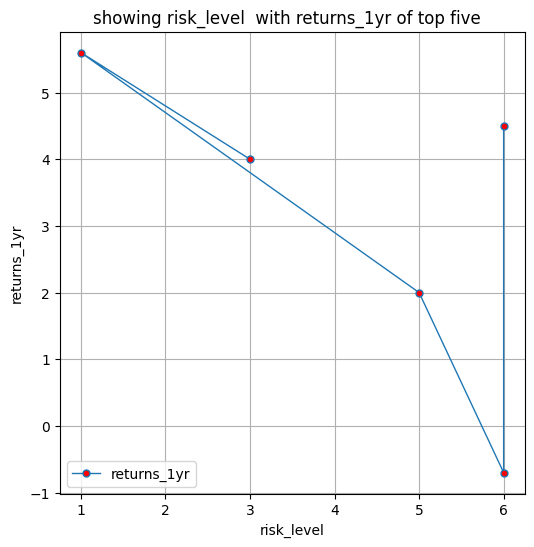

In [16]:
plt.figure(figsize=(6,6))
plt.plot(data['risk_level'].head(),data['returns_1yr'].head(),marker='.',markersize=10,label='returns_1yr',markerfacecolor='r',linewidth=1)
plt.legend(loc="lower left")
plt.xlabel('risk_level')
plt.ylabel('returns_1yr')
plt.title('showing risk_level  with returns_1yr of top five  ')
plt.grid()
plt.show()

## Conclusion :- the line chart illustrates the returns_1yr policy has more risk_level 3 at returns rate 5.7

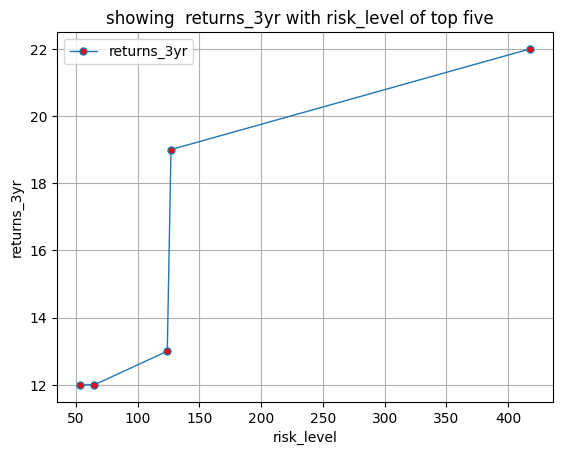

In [17]:
plt.plot(data['risk_level'].value_counts().head(),data['returns_3yr'].value_counts().head(),marker='.',markersize=10,label='returns_3yr',markerfacecolor='r',linewidth=1)
plt.legend(loc="upper left")
plt.xlabel('risk_level')
plt.ylabel('returns_3yr')
plt.title('showing  returns_3yr with risk_level of top five  ')
plt.grid()
plt.show()

##Conclusion :- the line chart illustrates the returns_3yr policy has more   returns rate > 6.0 at risk_level 2

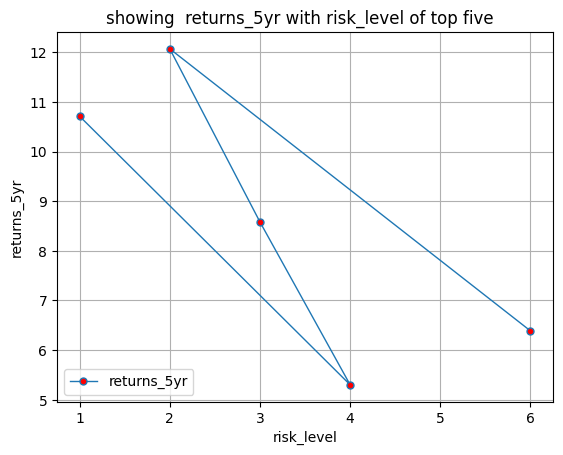

In [18]:
plt.plot(data['risk_level'].value_counts().head().index,data['returns_5yr'].value_counts().head().index,marker='.',markersize=10,label='returns_5yr',markerfacecolor='r',linewidth=1)
plt.legend(loc="lower left")
plt.xlabel('risk_level')
plt.ylabel('returns_5yr')
plt.title('showing  returns_5yr with risk_level of top five  ')
plt.grid()
plt.show()

### the line chart illustrates the returns_3yr policy has more returns rate > 12 at risk_level 2

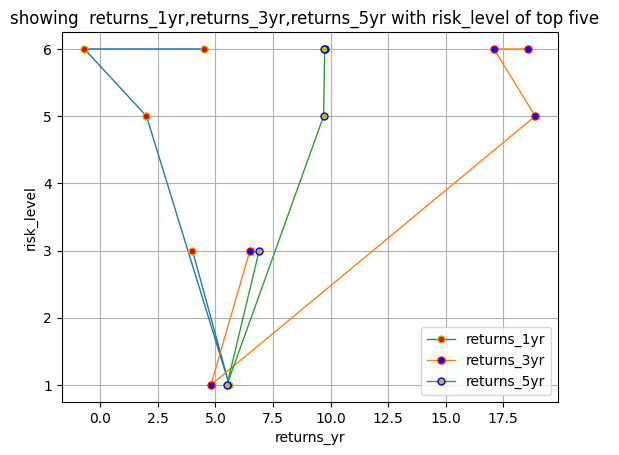

In [19]:
plt.plot(data['returns_1yr'].head(),data['risk_level'].head(),marker='.',markersize=10,label='returns_1yr',markerfacecolor='r',markeredgecolor='y',linewidth=1)
plt.plot(data['returns_3yr'].head(),data['risk_level'].head(),marker='.',markersize=10,label='returns_3yr',markerfacecolor='b',markeredgecolor='r',linewidth=1)
plt.plot(data['returns_5yr'].head(),data['risk_level'].head(),marker='.',markersize=10,label='returns_5yr',markerfacecolor='y',markeredgecolor='b',linewidth=1)
plt.legend(loc="lower right")
plt.ylabel('risk_level')
plt.xlabel('returns_yr')
plt.title('showing  returns_1yr,returns_3yr,returns_5yr with risk_level of top five  ')
plt.grid()
plt.show()

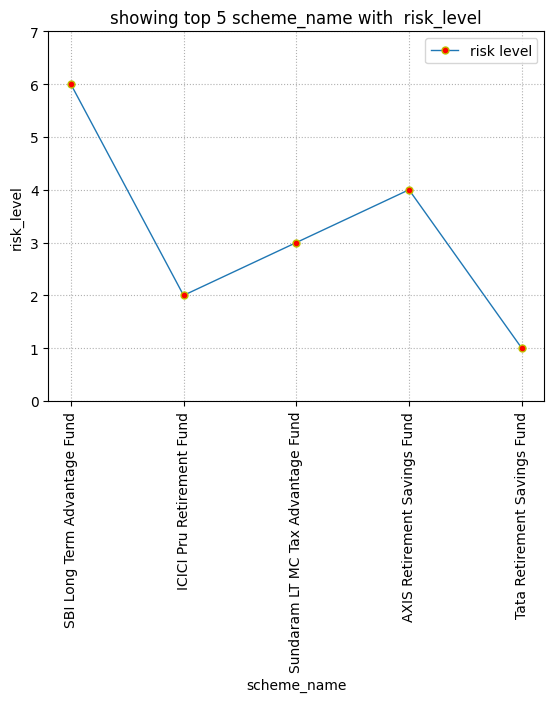

In [20]:
plt.plot(data['scheme_name'].value_counts().head().index,data['risk_level'].value_counts().head().index,marker='.',markersize=10,label='risk level',markerfacecolor='r',markeredgecolor='y',linewidth=1)
plt.grid(linestyle='dotted')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.xlabel('scheme_name')
plt.ylabel('risk_level')
plt.ylim(0,7)
plt.title('showing top 5 scheme_name with  risk_level')
plt.show()


## conclusion :- the line chart illustrates the SBI Long Advantage Fund has more risk than other scheme

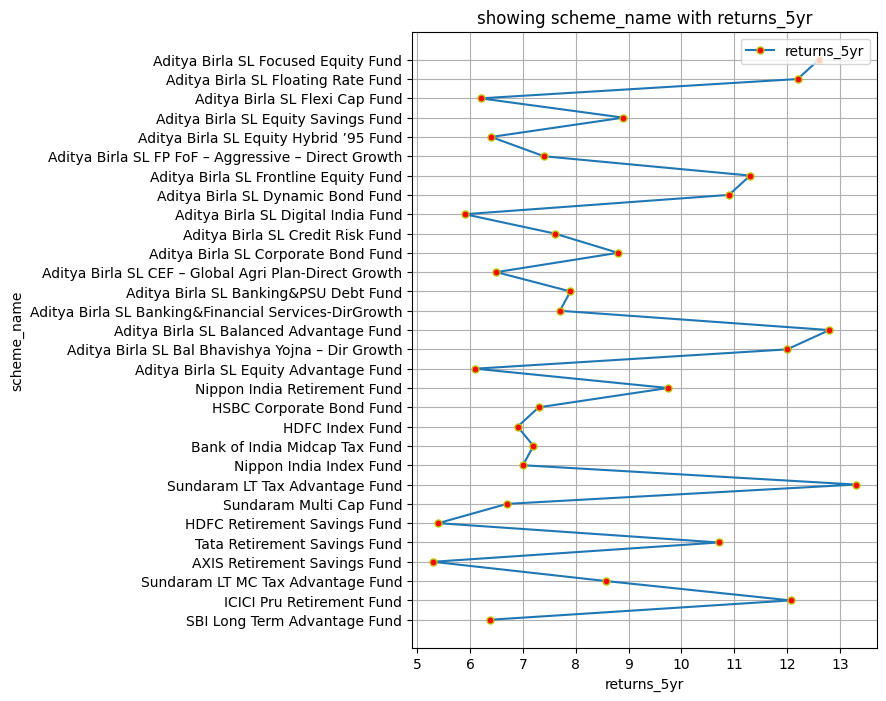

In [21]:
plt.figure(figsize=(6,8))
plt.plot(data['returns_5yr'].value_counts().sort_values(ascending=False).head(30).index,data['scheme_name'].value_counts().sort_values(ascending=False).head(30).index,marker='.',markersize=10,label='returns_5yr',markerfacecolor='r',markeredgecolor='y')
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('scheme_name')
plt.xlabel('returns_5yr')
plt.title('showing scheme_name with returns_5yr')
plt.show()

## conclusion:- The line chart illustrates the Sundaram LT Tax Advantage Fund gives more returns 5 yr policy at rate > 13

In [22]:
data['scheme_name'].value_counts().sort_values(ascending=False).head(30)

SBI Long Term Advantage Fund                            6
ICICI Pru Retirement Fund                               4
Sundaram LT MC Tax Advantage Fund                       3
AXIS Retirement Savings Fund                            3
Tata Retirement Savings Fund                            3
HDFC Retirement Savings Fund                            3
Sundaram Multi Cap Fund                                 3
Sundaram LT Tax Advantage Fund                          3
Nippon India Index Fund                                 2
Bank of India Midcap Tax Fund                           2
HDFC Index Fund                                         2
HSBC Corporate Bond Fund                                2
Nippon India Retirement Fund                            2
Aditya Birla SL Equity Advantage Fund                   1
Aditya Birla SL Bal Bhavishya Yojna – Dir Growth        1
Aditya Birla SL Balanced Advantage Fund                 1
Aditya Birla SL Banking&Financial Services-DirGrowth    1
Aditya Birla S

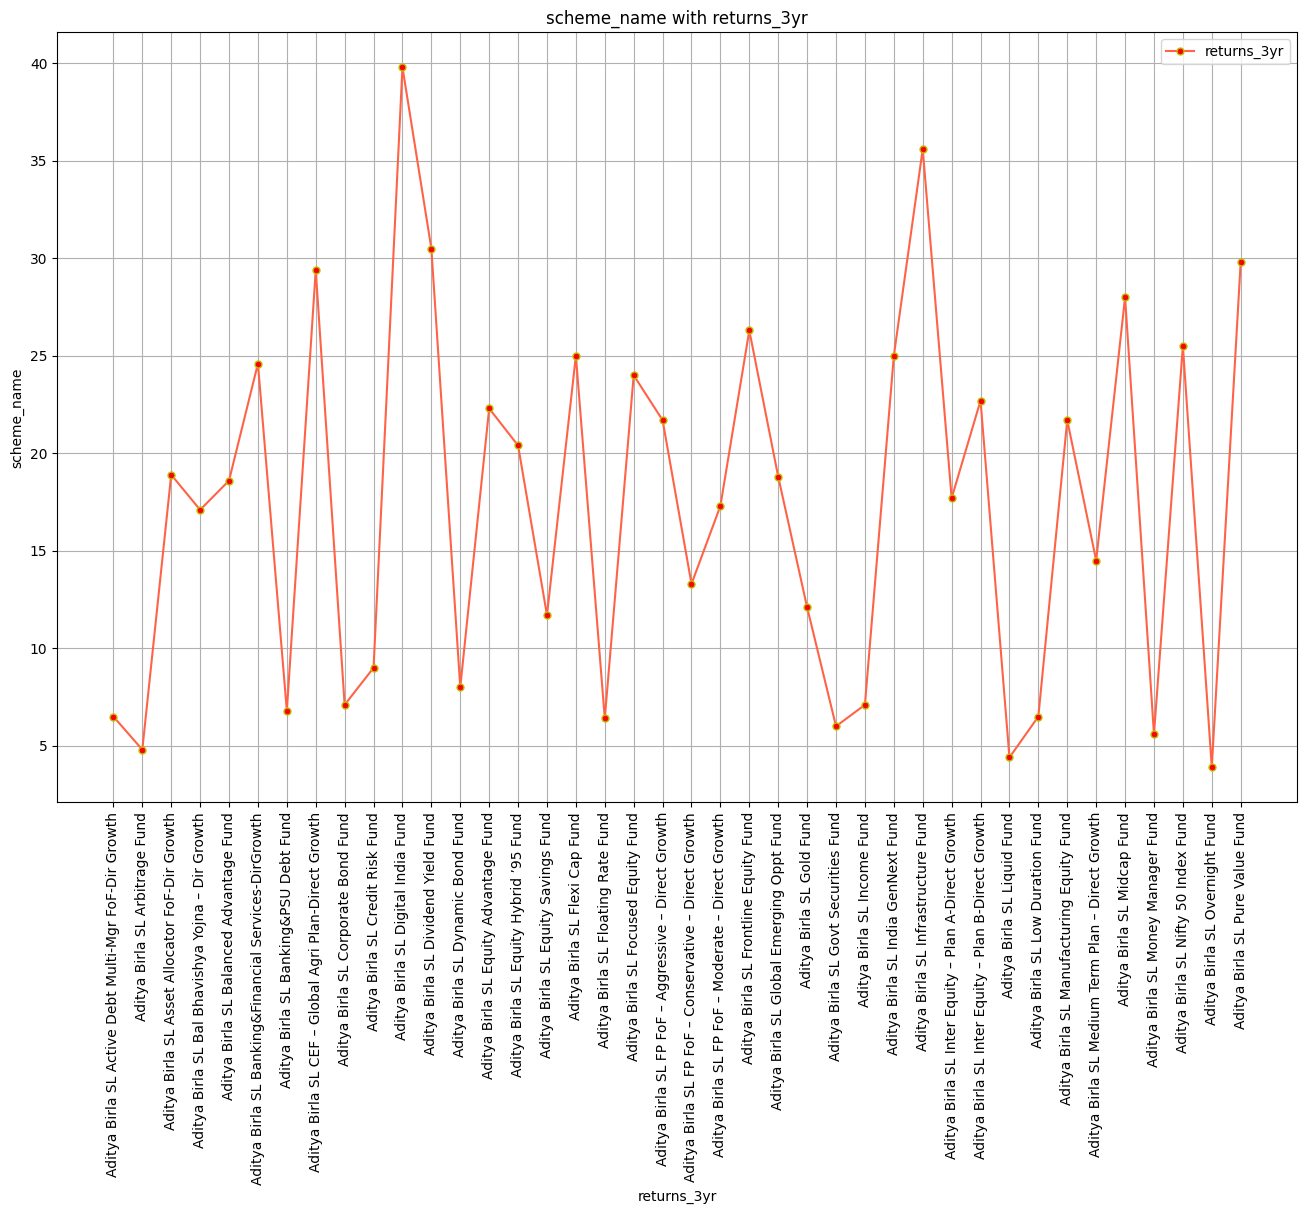

In [23]:
plt.figure(figsize=(16,10))
plt.plot(data['scheme_name'].head(40),data['returns_3yr'].head(40),color='tomato',marker='.',markersize=10,label='returns_3yr',markerfacecolor='r',markeredgecolor='y')
plt.grid()
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.ylabel('scheme_name')
plt.xlabel('returns_3yr')
plt.title('scheme_name with returns_3yr')
plt.show()

##  Aditya Birla SL Digital India Fund gives more returns in 3 year 

## Conclusion

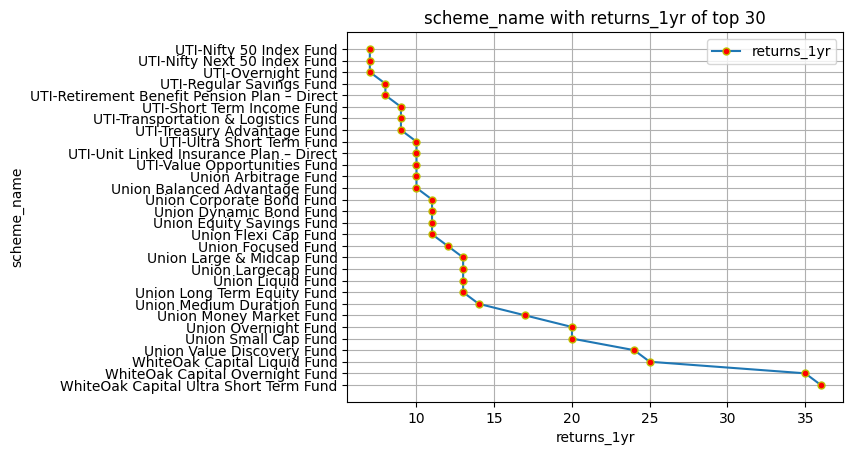

<Figure size 1000x500 with 0 Axes>

In [24]:
plt.plot(data['returns_1yr'].value_counts().sort_values(ascending=False).head(30),data['scheme_name'].sort_values(ascending=False).head(30),marker='.',markersize=10,label='returns_1yr',markerfacecolor='r',markeredgecolor='y')
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('scheme_name')
plt.xlabel('returns_1yr')
plt.title('scheme_name with returns_1yr of top 30')
plt.figure(figsize=(10,5))

plt.show()


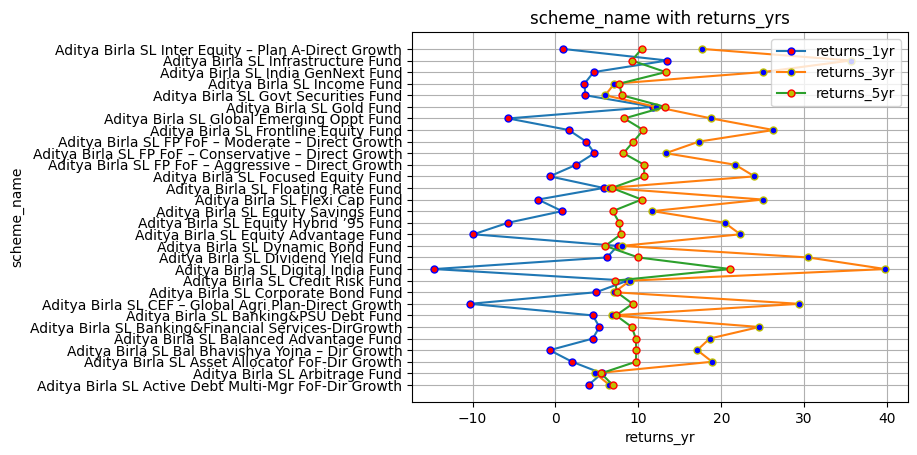

<Figure size 10000x65000 with 0 Axes>

In [25]:
plt.plot(data['returns_1yr'].head(30),data['scheme_name'].head(30),marker='.',markersize=10,label='returns_1yr',markerfacecolor='r',markeredgecolor='b')
plt.plot(data['returns_3yr'].head(30),data['scheme_name'].head(30),marker='.',markersize=10,label='returns_3yr',markerfacecolor='b',markeredgecolor='y')
plt.plot(data['returns_5yr'].head(30),data['scheme_name'].head(30),marker='.',markersize=10,label='returns_5yr',markerfacecolor='y',markeredgecolor='r')
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('scheme_name')
plt.xlabel('returns_yr')
plt.title('scheme_name with returns_yrs')
plt.figure(figsize=(100,650))
plt.show()

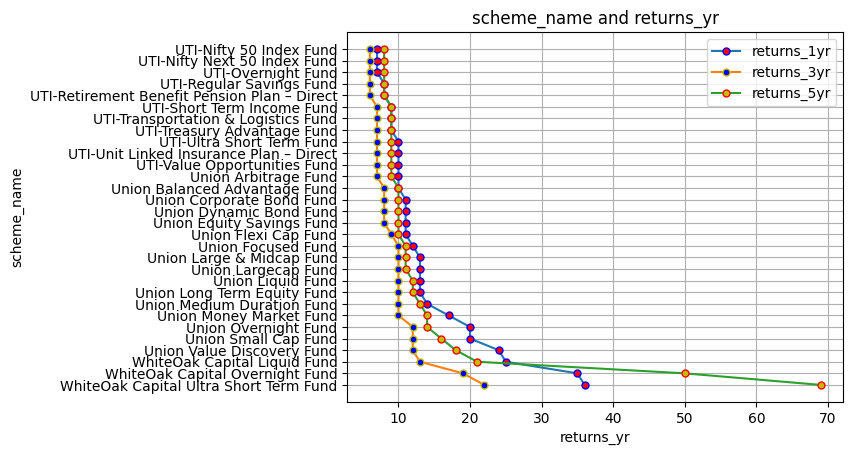

<Figure size 10000x60000 with 0 Axes>

In [26]:
plt.plot(data['returns_1yr'].value_counts().sort_values(ascending=False).head(30),data['scheme_name'].sort_values(ascending=False).head(30),marker='.',markersize=10,label='returns_1yr',markerfacecolor='r',markeredgecolor='b')
plt.plot(data['returns_3yr'].value_counts().sort_values(ascending=False).head(30),data['scheme_name'].sort_values(ascending=False).head(30),marker='.',markersize=10,label='returns_3yr',markerfacecolor='b',markeredgecolor='y')
plt.plot(data['returns_5yr'].value_counts().sort_values(ascending=False).head(30),data['scheme_name'].sort_values(ascending=False).head(30),marker='.',markersize=10,label='returns_5yr',markerfacecolor='y',markeredgecolor='r')
plt.grid()
plt.legend(loc='upper right')
plt.ylabel('scheme_name')
plt.xlabel('returns_yr')
plt.title('scheme_name and returns_yr')
plt.figure(figsize=(100,600))
#plt.savefig('sample.png')
plt.show()

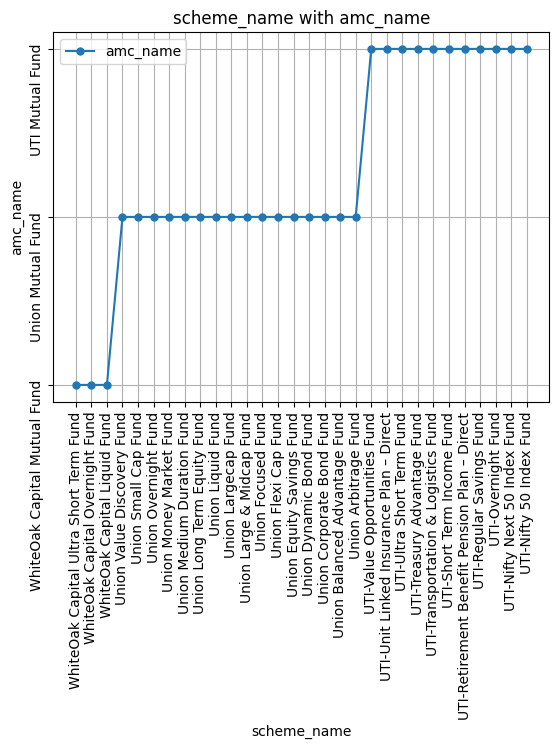

In [27]:
plt.plot(data['scheme_name'].sort_values(ascending=False).head(30),data['amc_name'].sort_values(ascending=False).head(30),marker='o',markersize=5,label='amc_name')
plt.grid()
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.legend(loc='upper left')
plt.ylabel('amc_name')
plt.xlabel('scheme_name')
plt.title('scheme_name with amc_name')
plt.show()

#plt.figure(figsize=(100,650))

In [28]:
data['returns_1yr'].sort_values(ascending=False).head(30)

89     130.8
97      28.3
321     24.3
451     23.2
88      22.3
300     22.1
34      22.1
314     21.1
566     20.4
741     17.1
243     16.5
403     16.2
198     16.0
234     16.0
659     16.0
159     15.8
358     15.0
623     15.0
634     14.8
522     14.6
66      14.5
223     14.4
337     14.3
612     14.3
236     14.2
551     14.2
448     14.2
806     14.1
727     14.0
464     13.9
Name: returns_1yr, dtype: float64

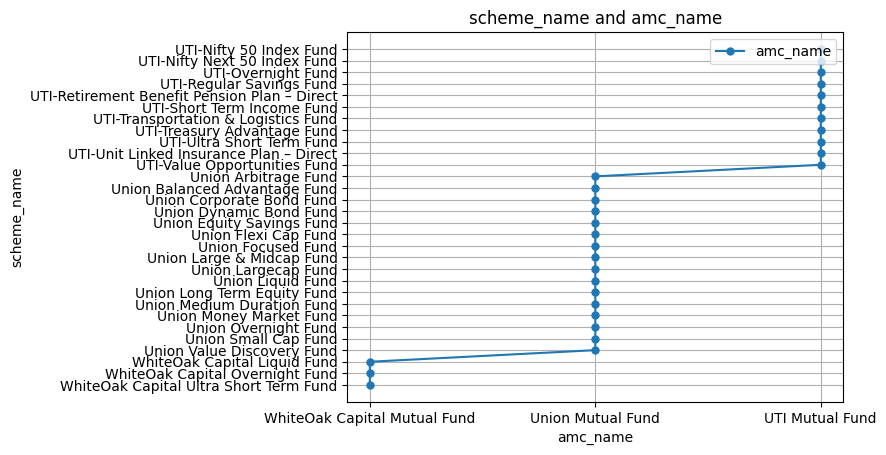

In [29]:
plt.plot(data['amc_name'].sort_values(ascending=False).head(30),data['scheme_name'].sort_values(ascending=False).head(30),marker='o',markersize=5,label='amc_name')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel('amc_name')
plt.ylabel('scheme_name')
plt.title('scheme_name and amc_name')
plt.show()

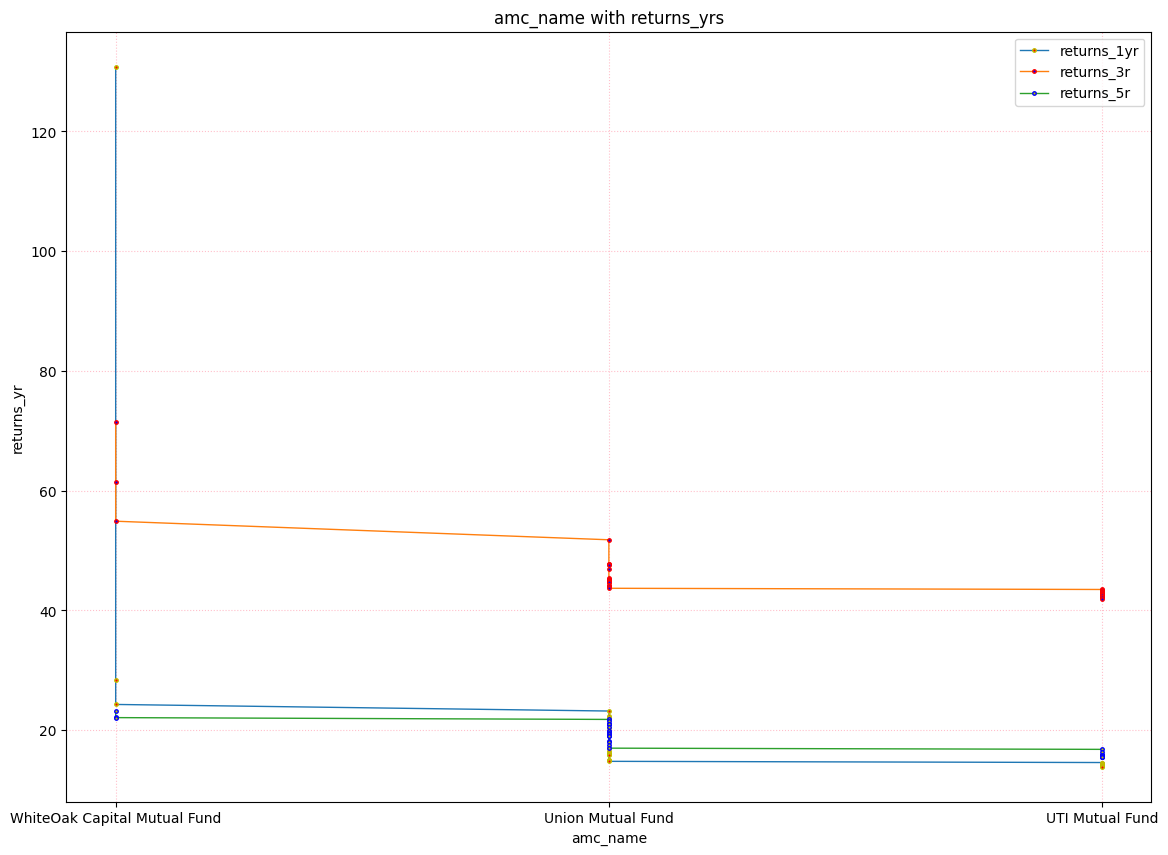

In [30]:
plt.figure(figsize=(14,10))
plt.plot(data['amc_name'].sort_values(ascending=False).head(30),data['returns_1yr'].sort_values(ascending=False).head(30),marker='.',markersize=5,linewidth=1,markerfacecolor='r',markeredgecolor='y',label='returns_1yr')
plt.plot(data['amc_name'].sort_values(ascending=False).head(30),data['returns_3yr'].sort_values(ascending=False).head(30),marker='.',markersize=5,linewidth=1,markerfacecolor='b',markeredgecolor='r',label='returns_3r')
plt.plot(data['amc_name'].sort_values(ascending=False).head(30),data['returns_5yr'].sort_values(ascending=False).head(30),marker='.',markersize=5,linewidth=1,markerfacecolor='y',markeredgecolor='b',label='returns_5r')
plt.legend(loc='upper right')
plt.grid(color='pink',linestyle='dotted')
plt.ylabel('returns_yr')
plt.xlabel('amc_name')
plt.title('amc_name with returns_yrs')
           
plt.show()

### scatter plot

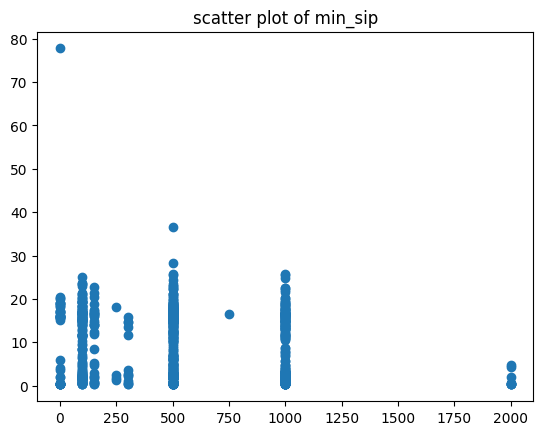

In [31]:
plt.scatter(data['min_sip'],data['sd'])
plt.title('scatter plot of min_sip')
plt.show()

Text(0, 0.5, 'scheme_name')

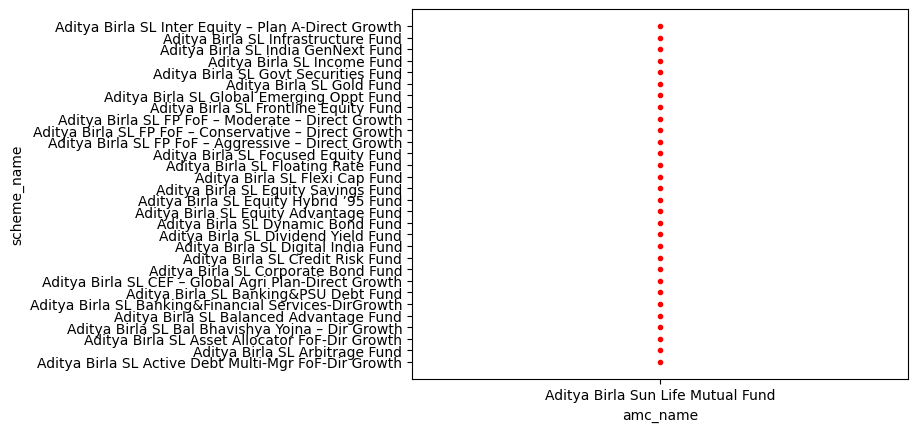

In [32]:
plt.scatter(data['amc_name'].head(30),data['scheme_name'].head(30),color='red',marker='.')
plt.xlabel('amc_name')
plt.ylabel('scheme_name')

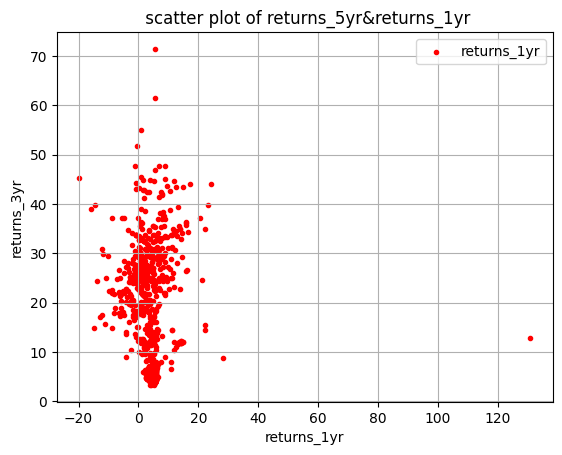

In [33]:
plt.scatter(data['returns_1yr'],data['returns_3yr'],color='red',marker='.',label='returns_1yr')
plt.xlabel('returns_1yr')
plt.ylabel('returns_3yr')
plt.title(' scatter plot of returns_5yr&returns_1yr')
plt.legend(loc='upper right')
plt.grid()
plt.show()

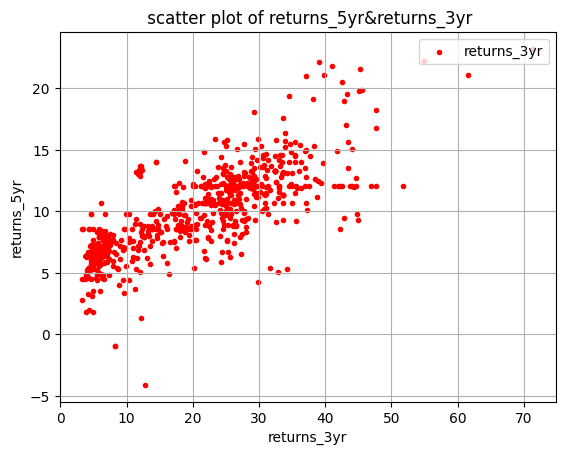

In [34]:
plt.scatter(data['returns_3yr'],data['returns_5yr'],color='red',marker='.',label='returns_3yr')
plt.xlabel('returns_3yr')
plt.ylabel('returns_5yr')
plt.title(' scatter plot of returns_5yr&returns_3yr')
plt.legend(loc='upper right')
plt.grid()
plt.show()

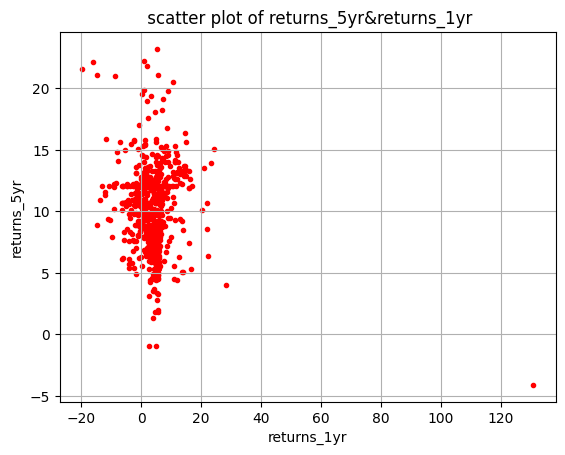

In [35]:
plt.scatter(data['returns_1yr'],data['returns_5yr'],color='red',marker='.')
plt.xlabel('returns_1yr')
plt.ylabel('returns_5yr')
plt.title(' scatter plot of returns_5yr&returns_1yr')
plt.grid()
plt.show()

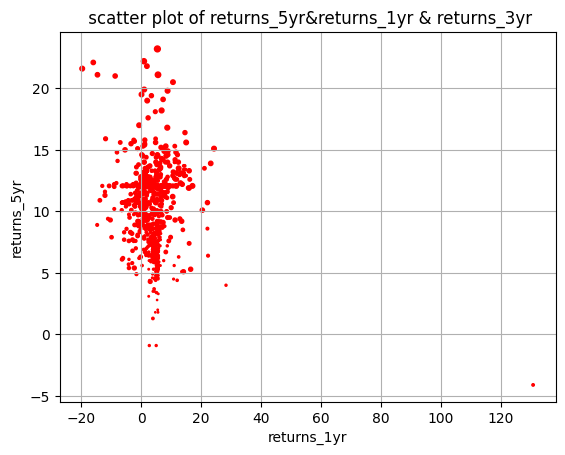

In [36]:
plt.scatter(data['returns_1yr'],data['returns_5yr'],data['returns_3yr'],color='red',marker='.')
plt.xlabel('returns_1yr')
plt.ylabel('returns_5yr')
plt.title(' scatter plot of returns_5yr&returns_1yr & returns_3yr')
plt.grid()
plt.show()

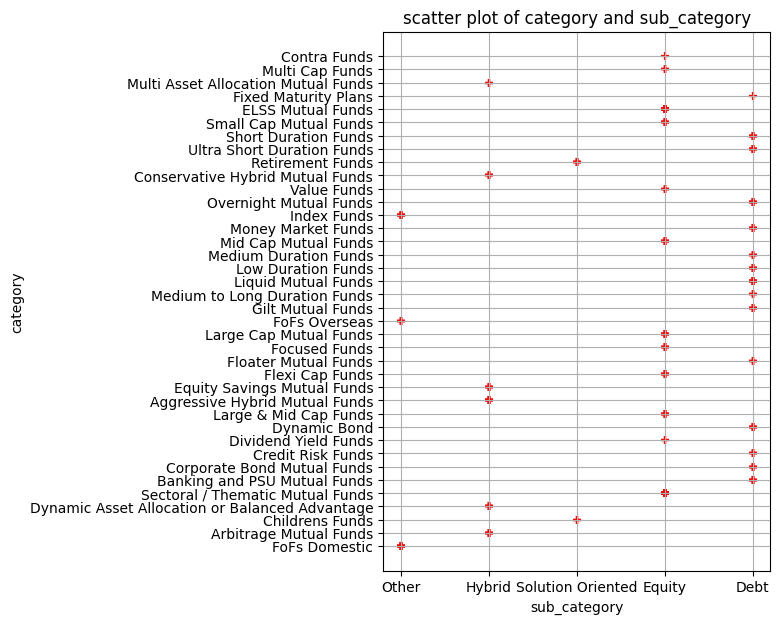

In [37]:
plt.figure(figsize=(5,7))
plt.scatter(data['category'],data['sub_category'],color='red',marker='+')
plt.title('scatter plot of category and sub_category')
plt.xlabel('sub_category')
plt.ylabel('category')
plt.grid()
plt.show()


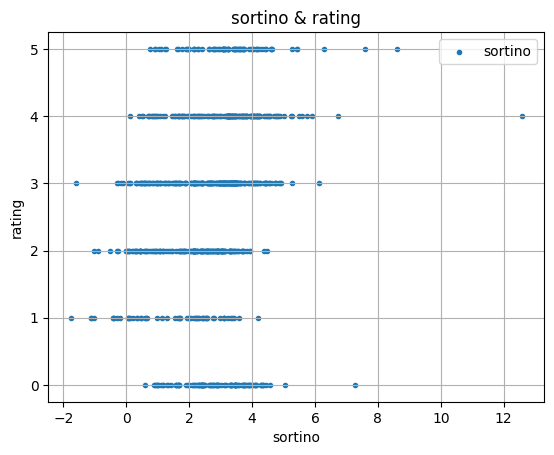

In [38]:
plt.scatter(data['sortino'],data['rating'],marker='.',label='sortino')
plt.xlabel('sortino')
plt.ylabel('rating')
plt.title('sortino & rating')
plt.grid()
plt.legend()
plt.show()


## Bar plot

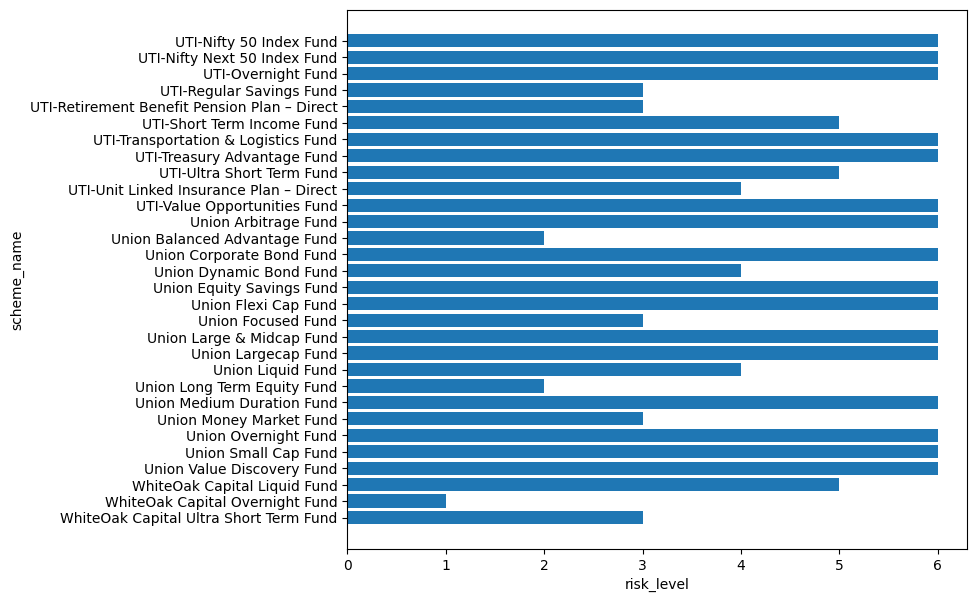

In [39]:
plt.figure(figsize=(8,7))
plt.barh(data['scheme_name'].sort_values(ascending=False).head(30),data['risk_level'].head(30))
x=data['scheme_name'].sort_values(ascending=False).head(30)
plt.xlabel('risk_level')
plt.ylabel('scheme_name')

#plt.figure(figsize(100,800))
plt.show()

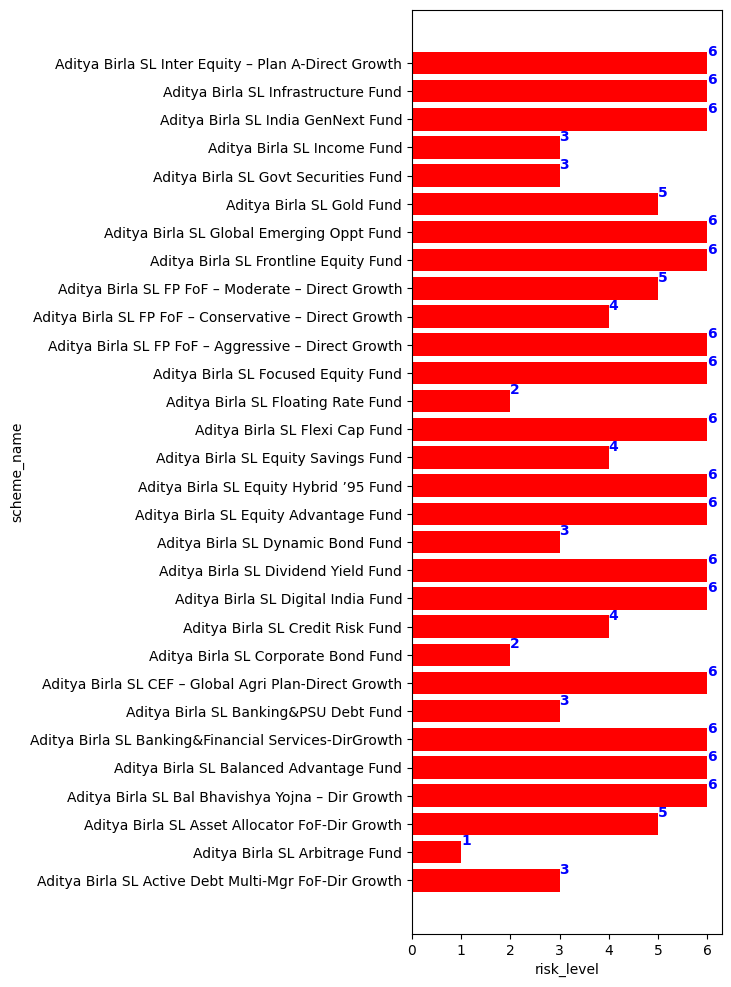

In [40]:
plt.figure(figsize=(4,12))
plt.barh(data['scheme_name'].head(30),data['risk_level'].head(30),color='red')
x=data['risk_level'].head(30)
for i, v in enumerate(x):
    plt.text(v , i + .25, str(v),color = 'blue', fontweight = 'bold')
plt.xlabel('risk_level')
plt.ylabel('scheme_name')
plt.show()

<Figure size 1000x1200 with 0 Axes>

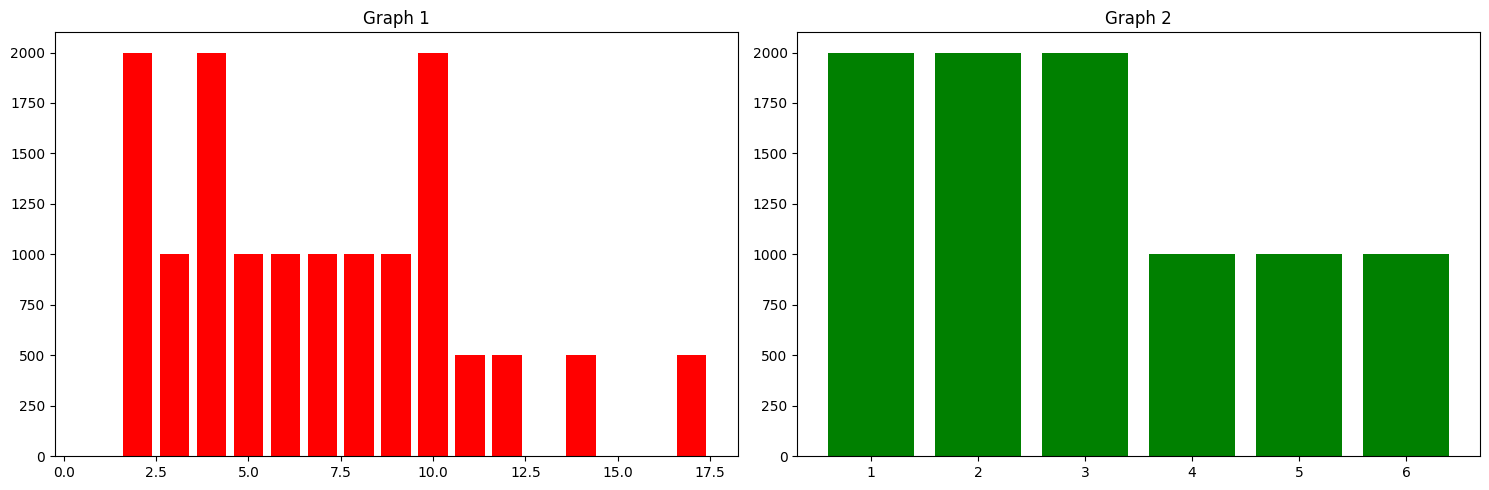

In [41]:
plt.figure(figsize=(10,12))
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].bar(data['fund_age_yr'],data['min_sip'],color='r')
axs[0].set_title('Graph 1')
plt.grid()
axs[1].bar(data['risk_level'],data['min_sip'],color='g')
axs[1].set_title('Graph 2')
plt.tight_layout()
plt.grid()
plt.show()


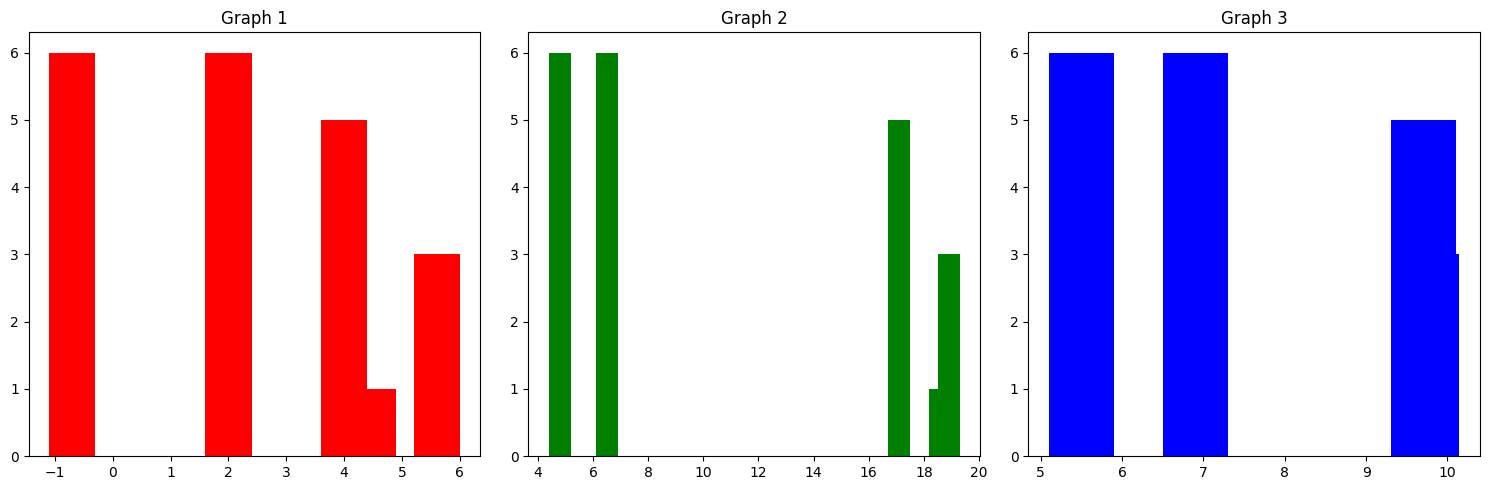

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].bar(data['returns_1yr'].head().sort_values(ascending=False),data['risk_level'].head(),color='r')
axs[0].set_title('Graph 1')
axs[1].bar(data['returns_3yr'].head().sort_values(ascending=False),data['risk_level'].head(),color='g')
axs[1].set_title('Graph 2')
axs[2].bar(data['returns_5yr'].head().sort_values(ascending=False),data['risk_level'].head(),color='b')
axs[2].set_title('Graph 3')
plt.tight_layout()
plt.show()

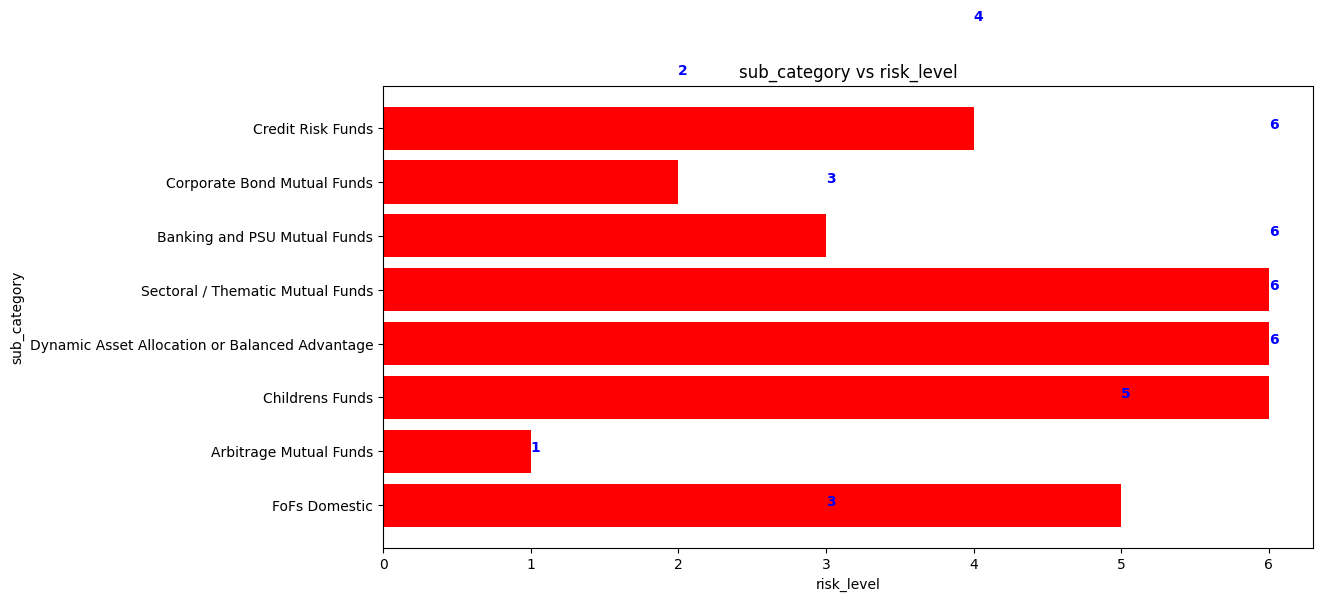

In [43]:
plt.figure(figsize=(12,6))
plt.barh(data['sub_category'].head(10),data['risk_level'].head(10),color='r')
plt.ylabel('sub_category')
plt.xlabel('risk_level')
plt.title('sub_category vs risk_level')
x=data['risk_level'].head(10)
for i, v in enumerate(x):
    plt.text(v ,i, str(v),color = 'blue', fontweight = 'bold')
plt.show()


Text(0.5, 1.0, 'category vs risk_level')

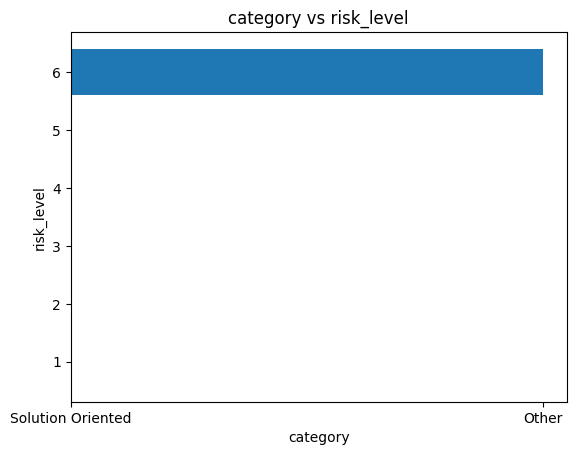

In [44]:
plt.barh(data['risk_level'].head(30),data['category'].sort_values(ascending=False).head(30))
plt.xlabel('category')
plt.ylabel('risk_level')
plt.title('category vs risk_level')


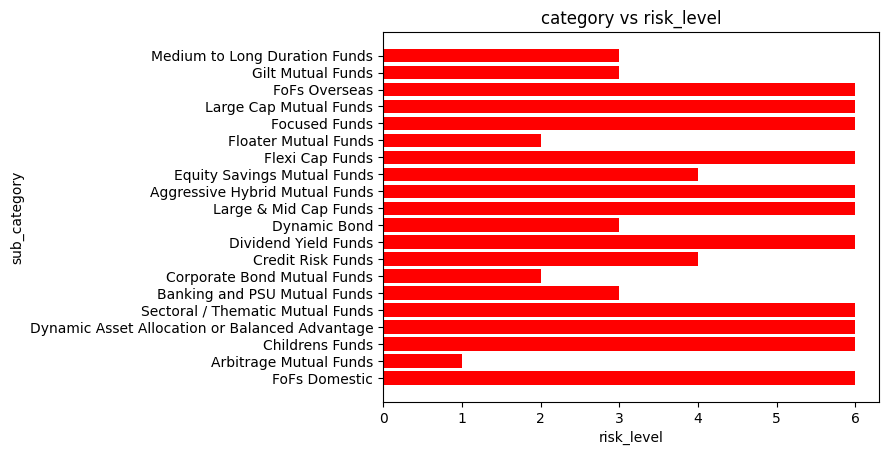

In [45]:
plt.barh(data['sub_category'].head(30),data['risk_level'].head(30),color='r')
plt.ylabel('sub_category')
plt.xlabel('risk_level')
plt.title('category vs risk_level')
plt.show()

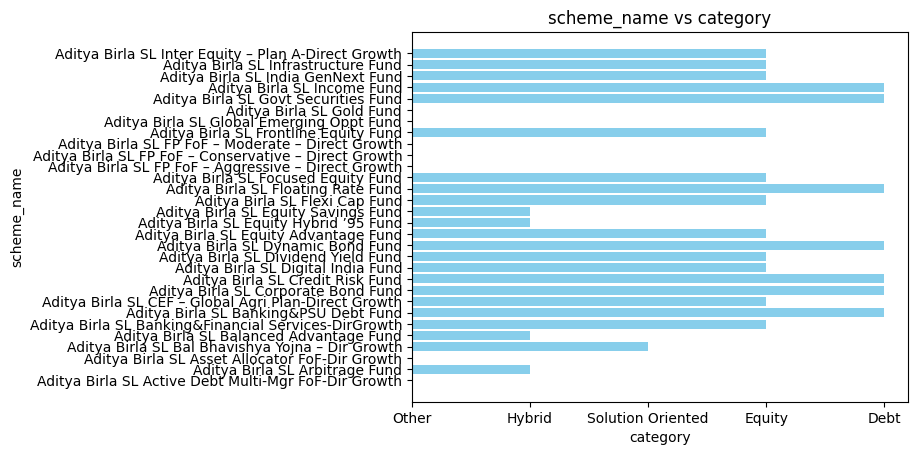

In [46]:
plt.barh(data['scheme_name'].head(30),data['category'].head(30),color='skyblue')
plt.ylabel('scheme_name')
plt.xlabel('category')
plt.title('scheme_name vs category')
plt.show()

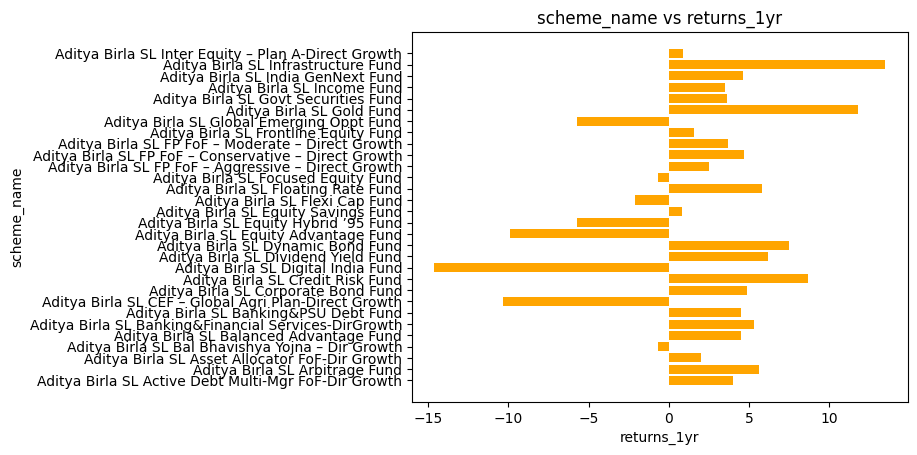

In [47]:
plt.barh(data['scheme_name'].head(30),data['returns_1yr'].head(30),color='orange')
plt.ylabel('scheme_name')
plt.xlabel('returns_1yr')
plt.title('scheme_name vs returns_1yr')
plt.show()

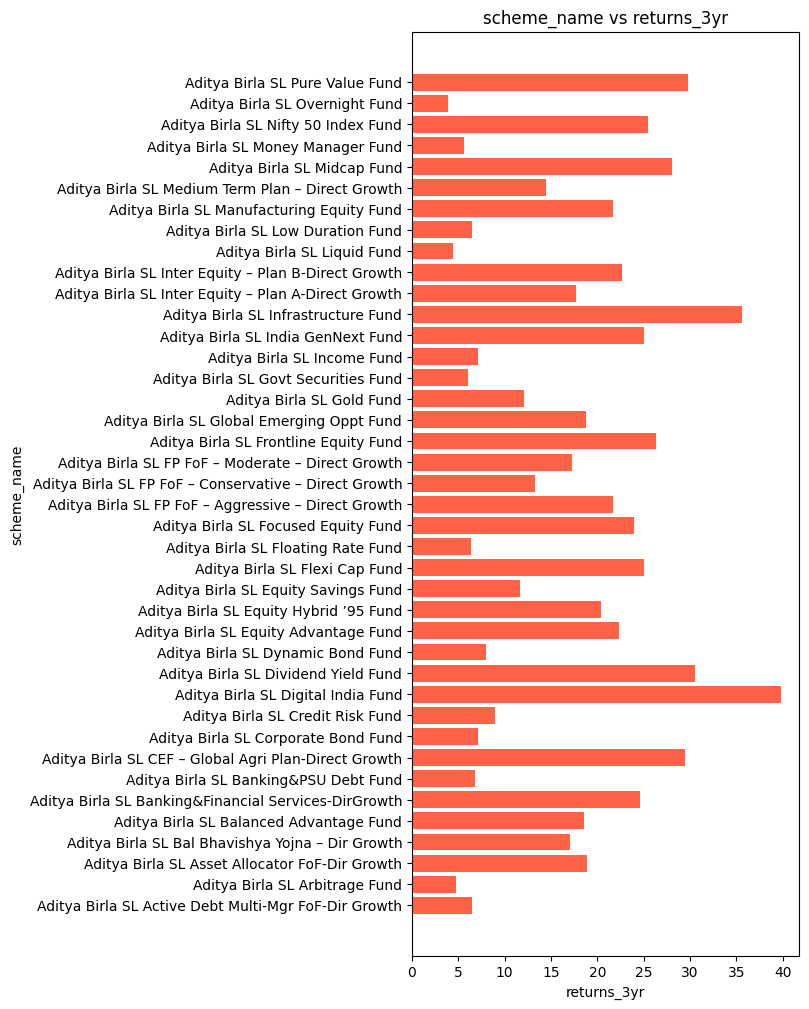

In [48]:
plt.figure(figsize=(5,12))
plt.barh(data['scheme_name'].head(40),data['returns_3yr'].head(40),color='tomato')
plt.ylabel('scheme_name')
plt.xlabel('returns_3yr')
plt.title('scheme_name vs returns_3yr')
plt.show()

## Aditya Birla SL Digital India Fund gets more returns in 3 years

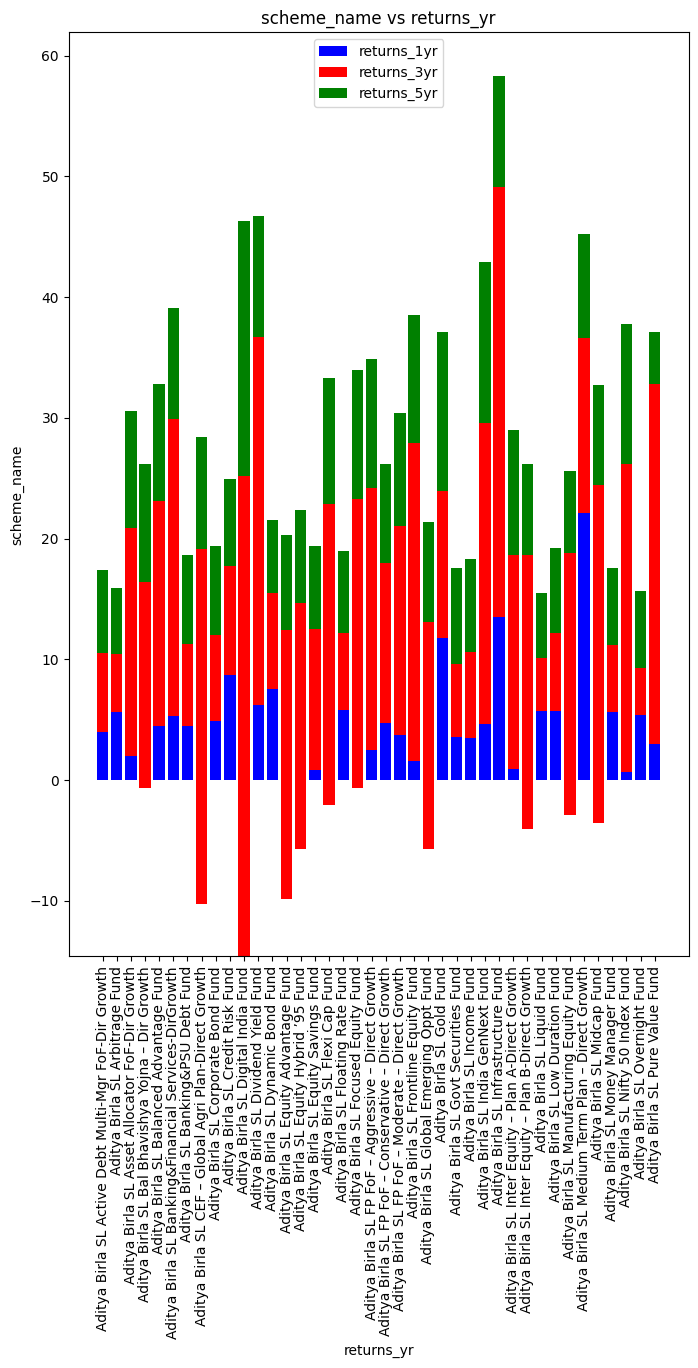

In [49]:
plt.figure(figsize=(8,12))
plt.bar(data['scheme_name'].head(40),data['returns_1yr'].head(40),color='blue',label='returns_1yr')
plt.bar(data['scheme_name'].head(40),data['returns_3yr'].head(40),bottom=(data['returns_1yr'].head(40)),color='red',label='returns_3yr')
plt.bar(data['scheme_name'].head(40),data['returns_5yr'].head(40),bottom=(data['returns_1yr'].head(40)+data['returns_3yr'].head(40)),color='green',label='returns_5yr')
plt.legend(loc='upper center')
plt.ylabel('scheme_name')
plt.xlabel('returns_yr')
plt.xticks(rotation=90)
plt.title('scheme_name vs returns_yr')
plt.show()

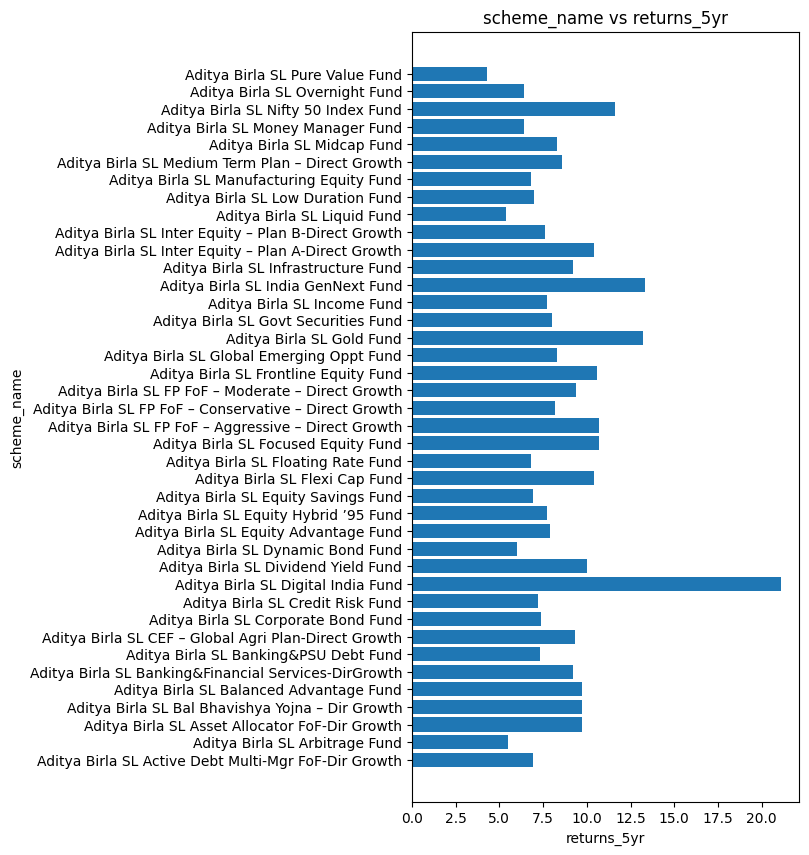

In [50]:
plt.figure(figsize=(5,10))

plt.barh(data['scheme_name'].head(40),data['returns_5yr'].head(40))
plt.ylabel('scheme_name')
plt.xlabel('returns_5yr')
plt.title('scheme_name vs returns_5yr')
plt.show()

## Aditya  Birla SL Digital India Fund gives more returns in 5 years

Text(0, 0.5, 'category')

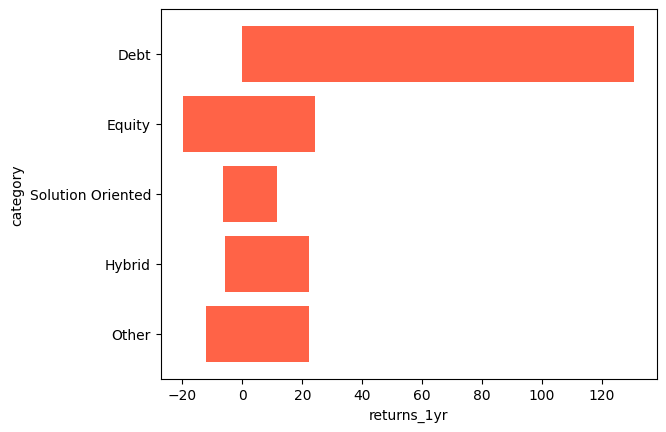

In [51]:
plt.barh(data['category'],data['returns_1yr'],color='Tomato')
plt.xlabel('returns_1yr')
plt.ylabel('category')

## Dept category gets more returns in 1 year

## Histogram

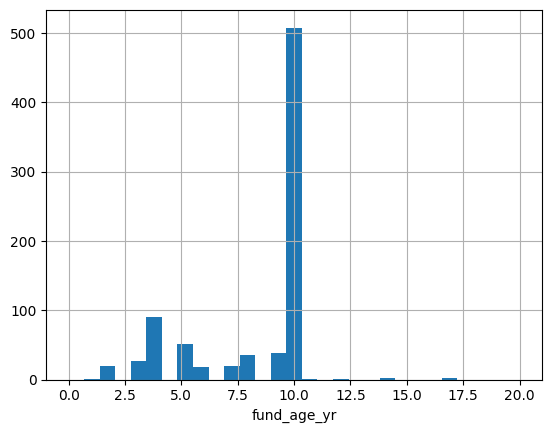

In [52]:
plt.hist(data['fund_age_yr'],bins=np.linspace(0,20,30))
plt.xlabel('fund_age_yr')
plt.grid()
plt.show()

## people puts their capital for 10 years th get more returns

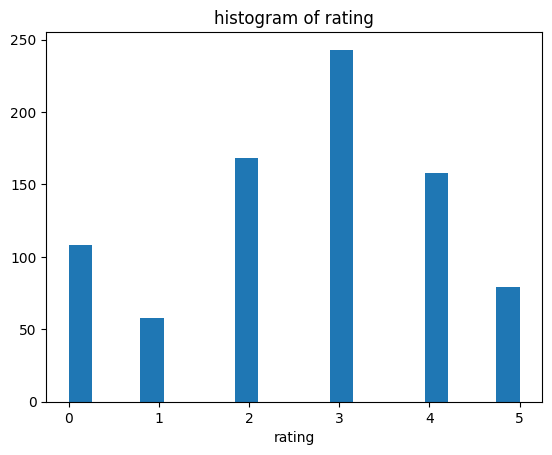

In [53]:
plt.hist(data['rating'],bins=np.linspace(0,5,20))
plt.xlabel('rating')
plt.title('histogram of rating')
plt.show()

## rating rate 3 has more rating rate as compare to other rate

### conclusion: 


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

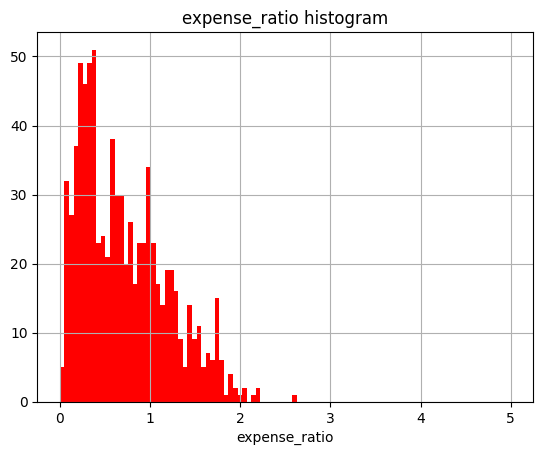

In [55]:
plt.hist(data['expense_ratio'],bins=np.linspace(0,5,100),color='red')
plt.xlabel('expense_ratio')
plt.title('expense_ratio histogram')
plt.grid()
plt.show()

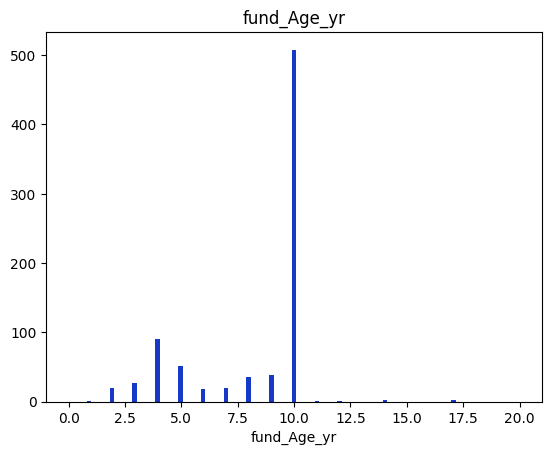

In [56]:
plt.hist(data['fund_age_yr'],bins=np.linspace(0,20,100),color='#163ac7')
plt.xlabel('fund_Age_yr')
plt.title('fund_Age_yr')
plt.show()

## People mostly put their capital for 10 years to get more returns

In [57]:
data['fund_size_cr'].min()

2.38

### Pie chart

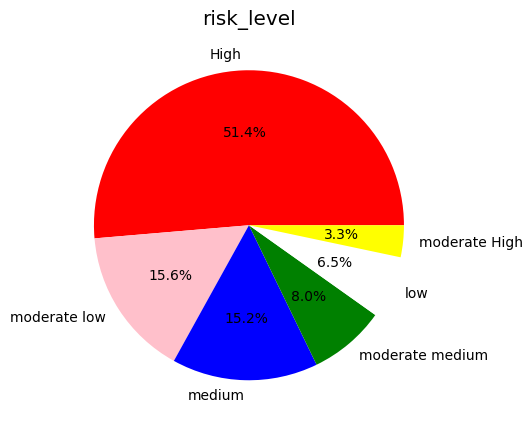

In [58]:
plt.figure(figsize=(5,10))
plt.pie(data['risk_level'].value_counts().sort_values(ascending=False),labels=["High","moderate low","medium","moderate medium","low","moderate High"],autopct='%0.1f%%',colors=['red','pink','blue','green','white','yellow'])
plt.style.use('classic') 
plt.title('risk_level')
plt.show()

## People takes high more for more returns

In [59]:
data['risk_level'].value_counts().sort_values(ascending=False),

(6    418
 2    127
 3    124
 4     65
 1     53
 5     27
 Name: risk_level, dtype: int64,)

In [60]:
data['risk_level'].unique()

array([3, 1, 5, 6, 2, 4], dtype=int64)

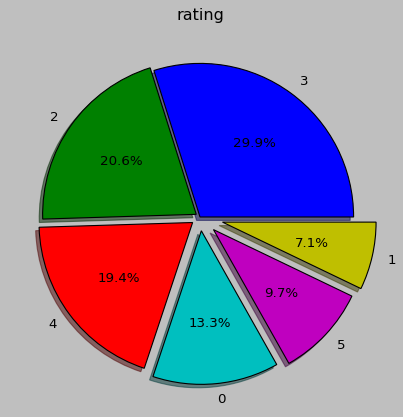

In [61]:
plt.pie(data['rating'].value_counts().sort_values(ascending=False),labels=data['rating'].value_counts().sort_values(ascending=False).index,autopct='%0.1f%%',shadow=True,explode=np.linspace(0,0.15,6))
plt.title('rating')
plt.show()

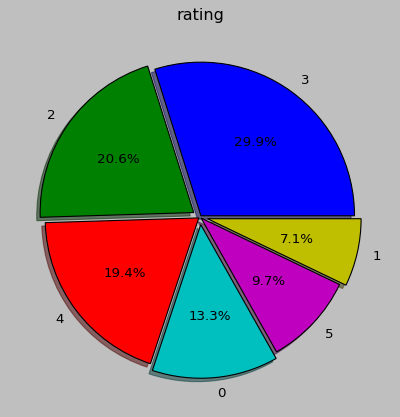

In [62]:
plt.pie(data['rating'].value_counts().sort_values(ascending=False),labels=data['rating'].value_counts().sort_values(ascending=False).index,autopct='%0.1f%%',shadow=True,explode=(0.01,0.05,0.01,0.05,0.01,0.05))
plt.title('rating')
plt.show()

## Rating 3 has more frequency than others rating

In [63]:
data['rating'].value_counts().sort_values(ascending=False)

3    243
2    168
4    158
0    108
5     79
1     58
Name: rating, dtype: int64

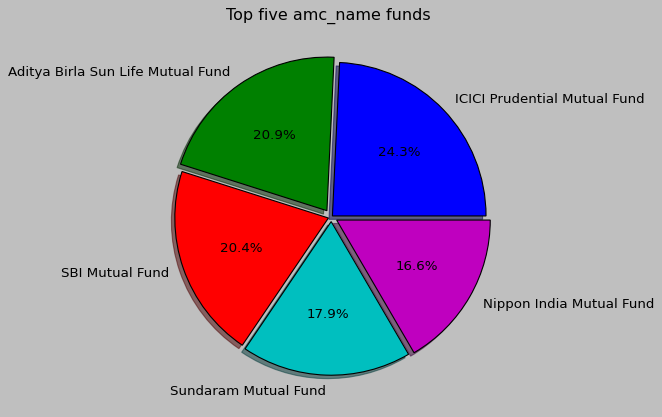

In [64]:
plt.pie(data['amc_name'].value_counts().sort_values(ascending=False).head(),labels=data['amc_name'].value_counts().sort_values(ascending=False).head().index,autopct='%0.1f%%',explode=[0.01,0.05,0.02,0.03,0.04],shadow=True)
plt.title('Top five amc_name funds ')
plt.show()

## ICICI PrudentialMutual Fund has more Popurality than others for more returns

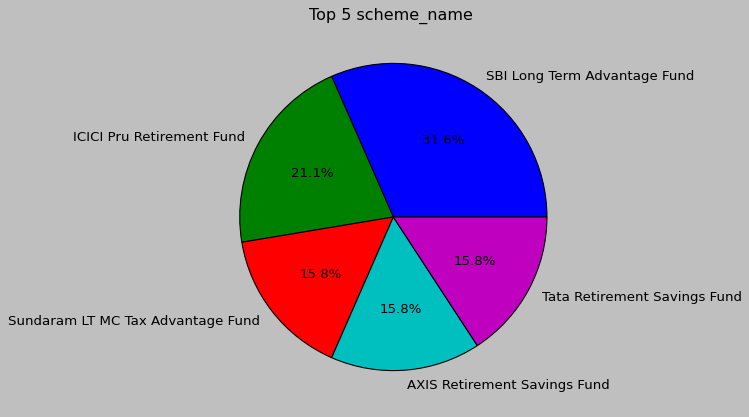

In [65]:
plt.pie(data['scheme_name'].value_counts().sort_values(ascending=False).head(),labels=data['scheme_name'].value_counts().sort_values(ascending=False).head().index,autopct='%0.1f%%')
plt.title('Top 5 scheme_name ')
plt.show()

## SBI Long Term Advanage Fund has more popurality

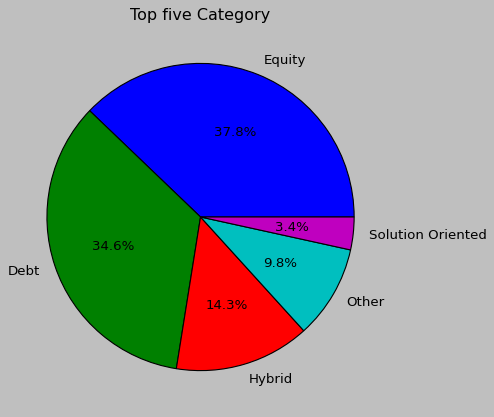

In [66]:
plt.pie(data['category'].value_counts().sort_values(ascending=False).head(10),labels=data['category'].value_counts().sort_values(ascending=False).head(10).index,autopct='%0.1f%%')
plt.title('Top five Category')
plt.show()

##  Equity has more popularity than other category

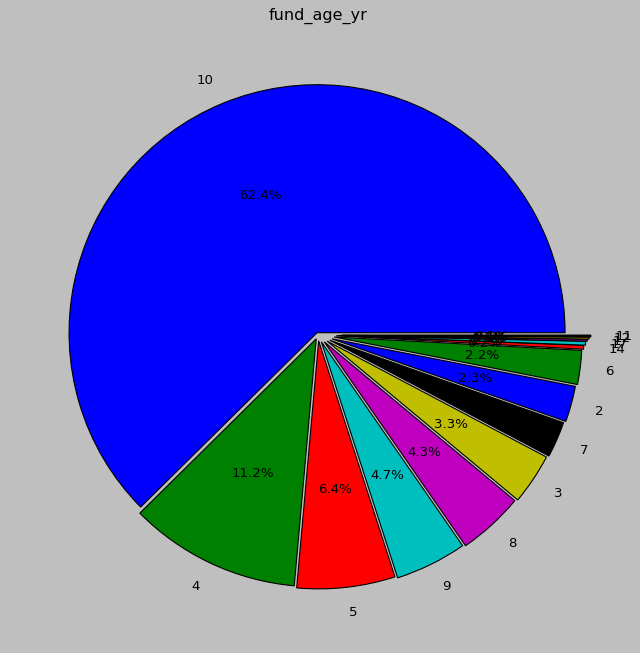

In [67]:
plt.figure(figsize=(10,12))
plt.pie(data['fund_age_yr'].value_counts().sort_values(ascending=False),labels=data['fund_age_yr'].value_counts().index,autopct='%0.1f%%',explode=np.linspace(0.01,0.1,14))
plt.title('fund_age_yr')
plt.show()

## people mostly believe on 10 year fund age for better returns

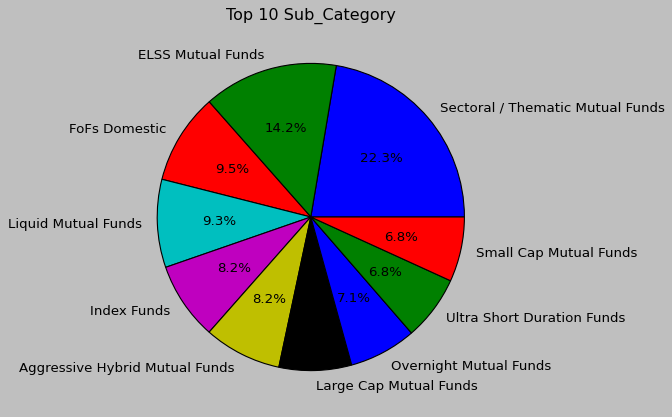

In [68]:
plt.pie(data['sub_category'].value_counts().sort_values(ascending=False).head(10),labels=data['sub_category'].value_counts().sort_values(ascending=False).head(10).index,autopct='%0.1f%%')
plt.title('Top 10 Sub_Category')
plt.show()

## People mostly believe on Sectoral / Thematic Mutual Funds 

In [69]:
data['rating'].value_counts().sort_values(ascending=False)

3    243
2    168
4    158
0    108
5     79
1     58
Name: rating, dtype: int64

In [70]:
data['scheme_name'].value_counts().sort_values(ascending=False).head()

SBI Long Term Advantage Fund         6
ICICI Pru Retirement Fund            4
Sundaram LT MC Tax Advantage Fund    3
AXIS Retirement Savings Fund         3
Tata Retirement Savings Fund         3
Name: scheme_name, dtype: int64

In [71]:
data['min_sip'].astype('float')

0       100.0
1      1000.0
2      1000.0
3       500.0
4       100.0
        ...  
809     500.0
810     500.0
811     500.0
812     500.0
813     500.0
Name: min_sip, Length: 814, dtype: float64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    float64
 8   alpha          814 non-null    float64
 9   sd             814 non-null    float64
 10  beta           814 non-null    float64
 11  sharpe         814 non-null    float64
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_1yr    814 non-null    float64
 18  returns_3y

In [73]:
data

scheme_name  min_sip  min_lumpsum  \
0    Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...      100          100   
1                       Aditya Birla SL Arbitrage Fund     1000         1000   
2       Aditya Birla SL Asset Allocator FoF-Dir Growth     1000         1000   
3     Aditya Birla SL Bal Bhavishya Yojna – Dir Growth      500         1000   
4              Aditya Birla SL Balanced Advantage Fund      100          100   
..                                                 ...      ...          ...   
809            UTI-Unit Linked Insurance Plan – Direct      500        15000   
810                       UTI-Value Opportunities Fund      500         5000   
811                       WhiteOak Capital Liquid Fund      500          500   
812                    WhiteOak Capital Overnight Fund      500          500   
813             WhiteOak Capital Ultra Short Term Fund      500          500   

     expense_ratio  fund_size_cr  fund_age_yr        fund_manager  sortino  \
0             0.27          10.0           10      Kaustubh Gupta     0.32   
1             0.36        4288.0           10    Lovelish Solanki     1.33   
2             0.53         157.0           10  Vinod Narayan Bhat     3.44   
3             0.76         637.0            4         Atul Penkar     2.18   
4             0.61        6386.0           10        Mohit Sharma     3.69   
..             ...           ...          ...                 ...      ...   
809           0.96        5068.0           10     Amandeep Chopra     2.47   
810           1.16        6740.0           10   Vetri Subramaniam     3.21   
811           0.26         197.0            4     Piyush Baranwal    -0.42   
812           0.22          14.0            4     Piyush Baranwal    -0.42   
813           0.33         141.0            4     Piyush Baranwal     2.81   

     alpha     sd  beta  sharpe  risk_level  \
0     2.24   9.39  0.01    0.24           3   
1     1.53   0.72  0.56    1.10           1   
2     2.67  10.58  0.67    1.42           5   
3    -6.37  14.99  0.85    0.90           6   
4     1.99  10.38  0.68    1.39           6   
..     ...    ...   ...     ...         ...   
809   0.92   7.06  0.44    1.29           4   
810   2.73  15.62  0.90    1.48           6   
811   0.93   0.39  0.72   -0.07           1   
812   0.93   0.39  0.72   -0.07           1   
813   1.20   0.72  0.47    0.80           1   

                              amc_name  rating           category  \
0    Aditya Birla Sun Life Mutual Fund       3              Other   
1    Aditya Birla Sun Life Mutual Fund       3             Hybrid   
2    Aditya Birla Sun Life Mutual Fund       3              Other   
3    Aditya Birla Sun Life Mutual Fund       2  Solution Oriented   
4    Aditya Birla Sun Life Mutual Fund       4             Hybrid   
..                                 ...     ...                ...   
809                    UTI Mutual Fund       0             Hybrid   
810                    UTI Mutual Fund       4             Equity   
811       WhiteOak Capital Mutual Fund       1               Debt   
812       WhiteOak Capital Mutual Fund       1               Debt   
813       WhiteOak Capital Mutual Fund       2               Debt   

                                       sub_category  returns_1yr  returns_3yr  \
0                                     FoFs Domestic          4.0          6.5   
1                            Arbitrage Mutual Funds          5.6          4.8   
2                                     FoFs Domestic          2.0         18.9   
3                                   Childrens Funds         -0.7         17.1   
4    Dynamic Asset Allocation or Balanced Advantage          4.5         18.6   
..                                              ...          ...          ...   
809  Dynamic Asset Allocation or Balanced Advantage         -0.7         13.1   
810                                     Value Funds          1.7         27.2   
811                   

In [74]:
data.iloc[4]

scheme_name             Aditya Birla SL Balanced Advantage Fund
min_sip                                                     100
min_lumpsum                                                 100
expense_ratio                                              0.61
fund_size_cr                                             6386.0
fund_age_yr                                                  10
fund_manager                                       Mohit Sharma
sortino                                                    3.69
alpha                                                      1.99
sd                                                        10.38
beta                                                       0.68
sharpe                                                     1.39
risk_level                                                    6
amc_name                      Aditya Birla Sun Life Mutual Fund
rating                                                        4
category                                

In [75]:
scheme=data.groupby('scheme_name')
scheme.get_group('Aditya Birla SL Banking&PSU Debt Fund')

scheme_name  min_sip  min_lumpsum  expense_ratio  \
6  Aditya Birla SL Banking&PSU Debt Fund     1000         1000           0.37   

   fund_size_cr  fund_age_yr    fund_manager  sortino  alpha    sd  beta  \
6        7994.0           10  Kaustubh Gupta     1.92   4.46  1.91  1.78   

   sharpe  risk_level                           amc_name  rating category  \
6    1.09           3  Aditya Birla Sun Life Mutual Fund       4     Debt   

                   sub_category  returns_1yr  returns_3yr  returns_5yr  
6  Banking and PSU Mutual Funds          4.5          6.8          7.3

In [76]:
scheme=data.groupby('risk_level')
scheme.get_group(6).shape[0]

418

In [77]:
data['scheme_name'].value_counts().sort_values(ascending=False).head(30).index

Index(['SBI Long Term Advantage Fund', 'ICICI Pru Retirement Fund',
       'Sundaram LT MC Tax Advantage Fund', 'AXIS Retirement Savings Fund',
       'Tata Retirement Savings Fund', 'HDFC Retirement Savings Fund',
       'Sundaram Multi Cap Fund', 'Sundaram LT Tax Advantage Fund',
       'Nippon India Index Fund', 'Bank of India Midcap Tax Fund',
       'HDFC Index Fund', 'HSBC Corporate Bond Fund',
       'Nippon India Retirement Fund', 'Aditya Birla SL Equity Advantage Fund',
       'Aditya Birla SL Bal Bhavishya Yojna – Dir Growth',
       'Aditya Birla SL Balanced Advantage Fund',
       'Aditya Birla SL Banking&Financial Services-DirGrowth',
       'Aditya Birla SL Banking&PSU Debt Fund',
       'Aditya Birla SL CEF – Global Agri Plan-Direct Growth',
       'Aditya Birla SL Corporate Bond Fund',
       'Aditya Birla SL Credit Risk Fund',
       'Aditya Birla SL Digital India Fund',
       'Aditya Birla SL Dynamic Bond Fund',
       'Aditya Birla SL Frontline Equity Fund',
       